# Modeling exercise

## General Instructions

* Submission date: 14.5.2023
* Submission Method: Link to your solution notebook in [this sheet](https://docs.google.com/spreadsheets/d/1GNPESGIhJpPb7LwMAyjF5qpJfZQak_mLkE3i5Y7a_VA/edit?usp=sharing).

In [2]:
import sys; sys.path.append('../src')
import numpy as np
import plotly_express as px

In [3]:
import pandas as pd
import ipywidgets as widgets

In [4]:
from datasets import make_circles_dataframe, make_moons_dataframe

## Fitting and Overfiting 

The goal of the following exercise is to:
* Observe overfitting due to insuffient data
* Observe Overfitting due to overly complex model
* Identify the overfitting point by looking at Train vs Test error dynamic
* Observe how noise levels effect the needed data samples and model capacity

### CREATED FUNCTIONS TO RUN ON

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math
### IMPORT THE LIBRARIES FOR SVM CALCULATION
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.svm import SVC # for Support Vector Classification model
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization

from sklearn.ensemble import RandomForestClassifier

### FOR PARALLEL LOOPS
import multiprocessing
import joblib
import asyncio
import time
pool_obj = multiprocessing.Pool()

In [6]:
### CREATE LOGISTIC REGRESSION FUNCTION 
def logsticRegression_Func(x_train,x_test,y_train,y_test,HP,RR):
    logreg=LogisticRegression(C=1/RR)
    logreg.fit(x_train,y_train)
    predictTest=logreg.predict(x_test)
    predictTrain = logreg.predict(x_train)
    return [accuracy_score(y_test,predictTest),accuracy_score(y_train,predictTrain)]


In [7]:
def rgf_SVM_func(x_train,x_test,y_train,y_test,HP,RR):
    clf = SVC(kernel='rbf', C=1/RR, gamma=HP)
    clf.fit(x_train, y_train)
    predictTest = clf.predict(x_test)
    predictTrain = clf.predict(x_train)
    return [accuracy_score(y_test,predictTest),accuracy_score(y_train,predictTrain)]


In [8]:
def knn_func(k,x_train,x_test,y_train,y_test,HP,RR):
    knn_classifier = KNeighborsClassifier(k)
    knn_classifier.fit(x_train,y_train)
    knn_res= knn_classifier.predict(x_test)
    predictTrain = knn_classifier.predict(x_train)
    return [accuracy_score(y_test,predictTest),accuracy_score(y_train,predictTrain)]


In [9]:
def randomForest_func(x_train,x_test,y_train,y_test,HP,RR):
    clf = RandomForestClassifier(max_depth=2, random_state=0,ccp_alpha=HP)
    clf.fit(x_train, y_train)
    predictTest = clf.predict(x_test)
    predictTrain = clf.predict(x_train)
    return  [accuracy_score(y_test,predictTest),accuracy_score(y_train,predictTrain)]
        

To do so, you'll code an experiment in the first part, and analyze the experiment result in the second part.

### Building an experiment

Code:

1. Create data of size N with noise level of magnitude NL from datasets DS_NAME. 
1. Split it to training and validation data (no need for test set), use 80%-20%. 
1. Use Logistic regression and Choose one complex model of your choice: [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [SVM with RBF kernel](https://scikit-learn.org/stable/modules/svm.html) with different `gamma` values or [Random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with differnt number of `min_samples_split`. 
1. Train on the train set for different hyper parameter values. compute:
   1. Classification accuracy on the training set (TRE)
   1. Classification accuracy on the validation set (TESTE)
   1. The difference beteen the two above (E_DIFF)
1. Save DS_NAME, N, NL, CLF_NAME, K, TRE, TESTE, E_DIFF and the regularization/hyper param (K, gamma or min_samples_split and regularization value for the linear regression classifier)

Repeat for:
* DS_NAME in Moons, Circles
* N (number of samples) in [5, 10, 50, 100, 1000, 10000]
* NL (noise level) in [0, 0.1, 0.2, 0.3, 0.4, 0.5]
* For the complex model: 10 Values of hyper parameter of the complex model you've chosen.
* For the linear model: 5 values of ridge (l2) regularization - [0.001, 0.01, 0.1, 1, 10, 100, 1000]

### FIRST TRY LOGISTIC REGRESTION

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math


In [11]:
# CREATE DATA FRAME WITH NOISE LEVEL 
circles_df = make_circles_dataframe(n_samples=500, noise_level=0)
circles_df.head()

,x,y,label
0,-0.850994,0.525175,A
1,0.509939,-0.616411,B
2,0.411552,0.686021,B
3,0.247214,-0.760845,B
4,-0.247214,0.760845,B


In [12]:
@widgets.interact
def plot_noisy_circles(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    df = make_circles_dataframe(1000, noise_level)
    return px.scatter(df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

In [13]:
### CREATE LOGISTIC REGRESSION ON DATA FRAME

logreg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(circles_df.loc[:,['x','y']],circles_df.label,test_size=0.3,random_state=42)
logreg.fit(x_train,y_train)
predict=logreg.predict(x_test)
accuracy_score(y_test,predict)


0.4533333333333333

In [14]:
### CREATE LOGITIC REGRESSION WITH BIGGER MODELING CAPACITY
x_train,x_test,y_train,y_test=train_test_split(circles_df.loc[:,['x','y']],circles_df.label,test_size=0.3,random_state=42)
adapted_x_train = np.square(x_train)
print(adapted_x_train.head())
print(x_train.head())

            x         y
5    0.127029  0.872971
116  0.592318  0.047682
45   0.553270  0.086730
16   0.607810  0.032190
462  0.244320  0.395680
            x         y
5   -0.356412  0.934329
116 -0.769622  0.218362
45   0.743821 -0.294500
16  -0.779621 -0.179417
462  0.494288 -0.629031


### CREATE LOGSTIC REGRESTION TRANSFORMATION

In [15]:
### CREATE LOGITIC REGRESSION WITH FOURIER TRANSFORM
x_train,x_test,y_train,y_test=train_test_split(circles_df.loc[:,['x','y']],circles_df.label,test_size=0.3,random_state=42)

power = (x_train.x**2+x_train.y**2).apply(math.sqrt)
teta = np.arctan(x_train.y/x_train.x)
x_transformed =(x_train.y/x_train.x).apply(math.cos)
y_transformed =(x_train.y/x_train.x).apply(math.sin)
x_train.x=power*x_transformed
x_train.y=power*y_transformed


### CREATE DATA FRAME FROM POWER AND TETA 

# df = pd.concat((power,teta),axis=1)
# df=pd.DataFrame({"power":power,"teta":teta,"label":y_train})
# px.scatter(data, x='power', y='teta')

# df.head()
@widgets.interact
def plot_noisy_circles(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    logreg=LogisticRegression()
    circles_df = make_circles_dataframe(1000, noise_level)
    power = (circles_df.x**2+circles_df.y**2).apply(math.sqrt)
    teta = np.arctan(circles_df.y/circles_df.x)
    df=pd.DataFrame({"power":power,"teta":teta,"label":circles_df.label})
    x_train,x_test,y_train,y_test=train_test_split(df.loc[:,['power','teta']],df.label,test_size=0.3,random_state=42)
    df_train=pd.DataFrame({"power":x_train.power,"teta":x_train.teta,"label":y_train})
    df_test=pd.DataFrame({"power":x_train.power,"teta":x_train.teta,"label":y_test})
    
    logreg.fit(df_train[['power','teta']],y_train)
    predict=logreg.predict(x_test)
    print("Accuracy score on training set is {}".format(accuracy_score(logreg.predict(x_train),y_train)))
    print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))
    return px.scatter(df, x='power', y='teta', color = 'label')




interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

### SVM TRY TO CREATE

In [16]:
%%html
<a href="https://towardsdatascience.com/svm-classifier-and-rbf-kernel-how-to-make-better-models-in-python-73bb4914af5b"> SVM with RBF kernel</a>


In [17]:
### IMPORT THE LIBRARIES FOR SVM CALCULATION
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.svm import SVC # for Support Vector Classification model

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization

In [18]:
def fittingSVM(X, y, C, gamma):
    x_train,x_test,y_train,y_test=train_test_split(X, y,test_size=0.3,random_state=42)

    # Fit the model
    # Note, available kernels: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
    model = SVC(kernel='rbf', probability=True, C=C, gamma=gamma)
    clf = model.fit(x_train, y_train)
    
    # Predict class labels on training data
    pred_labels_tr = model.predict(x_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(x_test)
    
    # Use score method to get accuracy of the model
    print('----- Evaluation on Test Data -----')
    score_te = model.score(x_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')

    print('----- Evaluation on Training Data -----')
    score_tr = model.score(x_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    
    # Return relevant data for chart plotting
    return x_train, x_test, y_train, y_test, clf

In [19]:
def Plot_3D_SVM(X, X_test, y_test, clf):
            
    # Specify a size of the mesh to be used
    mesh_size = 5
    margin = 1

    # Create a mesh grid on which we will run our model
    x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
    y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    xx, yy = np.meshgrid(xrange, yrange)
            
    # Calculate predictions on grid
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Create a 3D scatter plot with predictions
    fig = px.scatter_3d(x=X_test['x'], y=X_test['y'], z=y_test, 
                     opacity=0.8, color_discrete_sequence=['black'])

    # Set figure title and colors
    fig.update_layout(#title_text="Scatter 3D Plot with SVM Prediction Surface",
                      paper_bgcolor = 'white',
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0', 
                                              )))
    # Update marker size
    fig.update_traces(marker=dict(size=1))

    # Add prediction plane
    fig.add_traces(go.Surface(x=xrange, y=yrange, z=Z, name='SVM Prediction',
                              colorscale='RdBu', showscale=False, 
                              contours = {"z": {"show": True, "start": 0.2, "end": 0.8, "size": 0.05}}))
    fig.show()



In [20]:
# Fit the model and display results
x_train, x_test, y_train, y_test, clf = fittingSVM(circles_df.loc[:,['x','y']], circles_df.label, 1, 'scale')

----- Evaluation on Test Data -----
Accuracy Score:  1.0
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        73
           B       1.00      1.00      1.00        77

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  1.0
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       177
           B       1.00      1.00      1.00       173

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350

--------------------------------------------------------


/Users/sachar/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



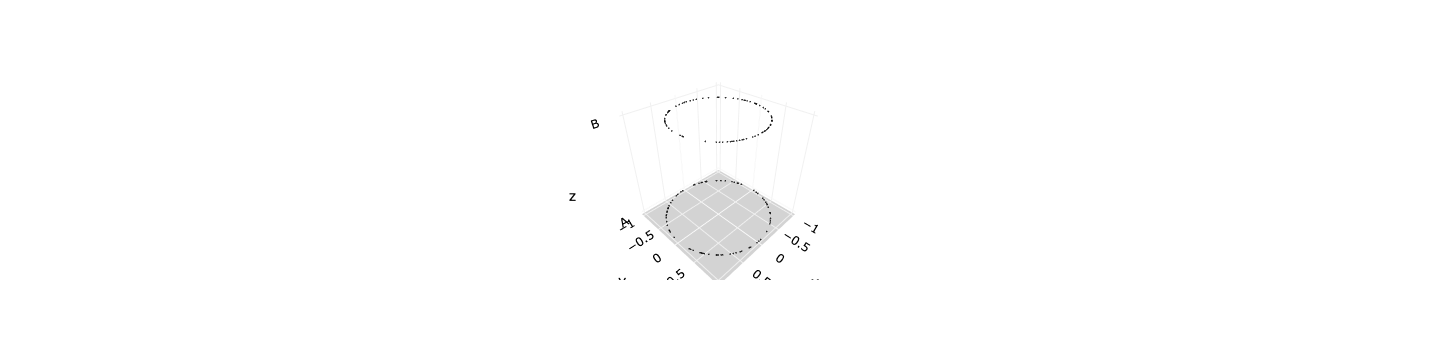

In [21]:
Plot_3D_SVM(circles_df.loc[:,['x','y']], x_test, y_test, clf)

### DB SCAN CREATE AND KNN (DB SCAN IS NOT RELEVANT)

In [22]:
%%html
<a href="https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works"> DB_SCAN_Clustering Algorithm</a>

In [23]:
### KNN (DB_SCAN) ALGORITHM 
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [24]:
distances = euclidean_distances(X=circles_df.loc[:,['x','y']])
distances = distances.ravel()
distances = pd.Series(distances)
distances.describe()

count    250000.000000
mean          1.156855
std           0.549261
min           0.000000
25%           0.696860
50%           1.264223
75%           1.611412
max           2.000000
dtype: float64

In [25]:
def calc_sse(grp):
    sse=0
    for label,group in grp:
        centroid = group[['x','y']].mean()
        sse+=((group[['x','y']]-centroid)**2).sum().sum()
    return sse

In [26]:
class KNN:
    def __init__(self,k:int):
        self.k = k
        print(f'Initiated a {k} nearset neighbors classifier')
    
    def fit(self,data:pd.DataFrame):
        self.data=data
    
    def predict(self,obsevations:(float,float))->(str,float):
        dis_observations = euclidean_distances([obsevations],self.data[['x','y']].values)
        index_KNeighbors = np.argsort(dis_observations)[0][:self.k]
        data_KNeighbors = self.data.iloc[index_KNeighbors]
        KNeighbors_class= data_KNeighbors['labels'].value_counts()
        class_observations = KNeighbors_class.idxmax()
        class_observations_probability = (KNeighbors_class/sum(KNeighbors_class)).max()
        return class_observations,class_observations_probability

In [27]:
knn_classifier = KNN(2)
x_train,x_test,y_train,y_test=train_test_split(circles_df.loc[:,['x','y']],circles_df.label,test_size=0.3,random_state=42)
knn_data=pd.concat((x_train[['x','y']],pd.Series(y_train,name='labels')),axis=1).head()
knn_classifier.fit(knn_data)

for x,y in zip(circles_df.loc[:,'x'],circles_df.loc[:,'y']):
    observations = (x,y)
    knn_classifier.predict(observations)

Initiated a 2 nearset neighbors classifier


In [28]:
knn_classifier = KNeighborsClassifier(5)
x_train,x_test,y_train,y_test=train_test_split(circles_df.loc[:,['x','y']],circles_df.label,test_size=0.3,random_state=42) 
knn_classifier.fit(x_train,y_train)
knn_res= knn_classifier.predict(x_test)
accuracy_score(y_test,knn_res)
print(knn_res[0:5])
print(y_test[0:5])


['A' 'A' 'A' 'B' 'A']
361    A
73     A
374    A
155    B
104    A
Name: label, dtype: object


In [29]:
@widgets.interact
def plot_noisy_circles(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    df = pd.concat((circles_df[['x','y']],pd.Series(knn_res,name='labels')),axis=1)
    return px.scatter(df, x='x', y='y', color = 'labels')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

Repeat for:
* DS_NAME in Moons, Circles
* N (number of samples) in [5, 10, 50, 100, 1000, 10000]
* NL (noise level) in [0, 0.1, 0.2, 0.3, 0.4, 0.5]
* For the complex model: 10 Values of hyper parameter of the complex model you've chosen.
* For the linear model: 5 values of ridge (l2) regularization - [0.001, 0.01, 0.1, 1, 10, 100, 1000]

### CREATE RUN FUNCTION ON ALL PARAMETERS

In [30]:
def createDataSet(DS_NAME,N,NL):
    df:pd.DataFrame
    if(DS_NAME == "Moons"):
        df= make_moons_dataframe(N,NL)
    else:
        df= make_circles_dataframe(N,NL)
    return df
    


In [31]:
def dateCreateAndModelRun(x_train,x_test,y_train,y_test,HP,RR):
    return rgf_SVM_func(x_train,x_test,y_train,y_test,HP,RR)
    


In [32]:
def calculationToEveryDataSet(DS_NAME,Ns,NLs,HPs,RRs):
    results = pd.DataFrame(columns=['N_Sample','Noise_Level','Hyper_Params','ridge_regularization','k','TrainScore','TestScore','diffScore'])
    k_folds = 10
    for N in Ns:
            for NL in NLs:
                df=createDataSet(DS_NAME,N,NL)
                x_train,x_test,y_train,y_test=train_test_split(df.loc[:,['x','y']],df.label,test_size=0.2,random_state=42)
                training_data=pd.DataFrame({'x':x_train.x,'y':x_train.y,'target':y_train})
                fold_size = int(len(x_train) / k_folds) 
                for k in range(k_folds):
                    fold_data = training_data[k * fold_size: (k+1) * fold_size]
                    train_data = training_data[~x_train.index.isin(fold_data)]
                    for HP in HPs:
                        for RR in RRs:
                            score = dateCreateAndModelRun(train_data.loc[:,['x','y']],fold_data.loc[:,['x','y']],train_data['target'],fold_data['target'],HP,RR)
                            results=results.append({'N_Sample': N, 'Noise_Level': NL, 'Hyper_Params': HP, 'ridge_regularization': RR,'k':k, 'TrainScore': score[1],'TestScore': score[0],'diffScore':score[1]-score[0]},ignore_index=True)
    return results

#### Try To Run In Parallel

In [33]:
#process_data.py

# import pandas as pd

# def processed_data_func(N, NL, HP, RR):
#     df = createDataSet(DS_NAME, N, NL)
#     x_train, x_test, y_train, y_test = train_test_split(df.loc[:,['x','y']], df.label, test_size=0.2, random_state=42)
#     training_data = pd.DataFrame({'x': x_train.x, 'y': x_train.y, 'target': y_train})
#     fold_size = int(len(x_train) / k_folds)

#     for k in range(k_folds):
#         fold_data = training_data[k * fold_size: (k+1) * fold_size]
#         train_data = training_data[~x_train.index.isin(fold_data)]
#         score = dateCreateAndModelRun(train_data.loc[:,['x','y']], fold_data.loc[:,['x','y']], train_data['target'], fold_data['target'], HP, RR)
#         results = results.append({'N_Sample': N, 'Noise_Level': NL, 'Hyper_Params': HP, 'ridge_regularization': RR, 'k': k, 'TrainScore': score[1], 'TestScore': score[0], 'diffScore': score[1] - score[0]}, ignore_index=True)

In [34]:
import pandas as pd
import multiprocessing as mp

class CalculationData:
    def __init__(self,DS_NAME, Ns, NLs, HPs, RRs):
        self.DS_NAME = DS_NAME
        self.Ns = Ns
    def processed_data_func(self,N, NL, HP, RR):
            df = createDataSet(DS_NAME, N, NL)
            x_train, x_test, y_train, y_test = train_test_split(df.loc[:,['x','y']], df.label, test_size=0.2, random_state=42)
            training_data = pd.DataFrame({'x': x_train.x, 'y': x_train.y, 'target': y_train})
            fold_size = int(len(x_train) / k_folds)

            for k in range(k_folds):
                fold_data = training_data[k * fold_size: (k+1) * fold_size]
                train_data = training_data[~x_train.index.isin(fold_data)]
                score = dateCreateAndModelRun(train_data.loc[:,['x','y']], fold_data.loc[:,['x','y']], train_data['target'], fold_data['target'], HP, RR)
                results = results.append({'N_Sample': N, 'Noise_Level': NL, 'Hyper_Params': HP, 'ridge_regularization': RR, 'k': k, 'TrainScore': score[1], 'TestScore': score[0], 'diffScore': score[1] - score[0]}, ignore_index=True)

    def calculationToEveryDataSet_parallel(self,DS_NAME, Ns, NLs, HPs, RRs):
        results = pd.DataFrame(columns=['N_Sample','Noise_Level','Hyper_Params','ridge_regularization','k','TrainScore','TestScore','diffScore'])
        k_folds = 10

        pool = mp.Pool(mp.cpu_count())  # Create a pool of worker processes
        tasks = []

        for N in Ns:
            for NL in NLs:
                for HP in HPs:
                    for RR in RRs:
                        tasks.append(pool.apply_async(self.processed_data_func, args=(N, NL, HP, RR)))

        # Wait for all processes to finish
        pool.close()
        pool.join()

        # Get results from completed processes
        for task in tasks:
            task.get()

        return results

In [35]:
import warnings
### FOR PARALLEL LOOPS
import multiprocessing
import joblib
import asyncio
import time
from multiprocessing import Process, Queue

pool_obj = multiprocessing.Pool()

warnings.simplefilter(action='ignore', category=FutureWarning)
models_functions=[logsticRegression_Func,rgf_SVM_func,knn_func,randomForest_func]
DS_NAMEs = ['Moons', 'Circles']
k_folds = 5
Ns= [25, 50, 100, 1000]
NLs=[0, 0.1, 0.2, 0.3, 0.4]
HPs= [0.1,0.2,0.3,0.4]
RRs= [0.001, 0.01, 0.1, 1, 10, 100]


#### Result On Datas 

In [36]:
pool_obj = multiprocessing.Pool()
# if __name__ == '__main__':
#     freeze_support()
calcObject = CalculationData('Moons',Ns,NLs,HPs,RRs)
# results= calcObject.calculationToEveryDataSet_parallel('Moons',Ns,NLs,HPs,RRs)
results= calculationToEveryDataSet('Circles',Ns,NLs,HPs,RRs)

In [37]:
results.query('k==5')

,N_Sample,Noise_Level,Hyper_Params,ridge_regularization,k,TrainScore,TestScore,diffScore
120,25.0,0.0,0.1,0.001,5.0,1.00000,1.0000,0.00000
121,25.0,0.0,0.1,0.010,5.0,1.00000,1.0000,0.00000
122,25.0,0.0,0.1,0.100,5.0,0.55000,0.5000,0.05000
123,25.0,0.0,0.1,1.000,5.0,0.55000,0.5000,0.05000
124,25.0,0.0,0.1,10.000,5.0,0.55000,0.5000,0.05000
...,...,...,...,...,...,...,...,...
4699,1000.0,0.4,0.4,0.010,5.0,0.62500,0.5875,0.03750
4700,1000.0,0.4,0.4,0.100,5.0,0.63125,0.6000,0.03125
4701,1000.0,0.4,0.4,1.000,5.0,0.61375,0.5625,0.05125
4702,1000.0,0.4,0.4,10.000,5.0,0.60500,0.5875,0.01750


In [38]:
results.groupby(['N_Sample','Noise_Level','Hyper_Params','ridge_regularization'])['TestScore'].mean()

N_Sample  Noise_Level  Hyper_Params  ridge_regularization
25.0      0.0          0.1           0.001                   1.00000
                                     0.010                   1.00000
                                     0.100                   0.55000
                                     1.000                   0.55000
                                     10.000                  0.55000
                                                              ...   
1000.0    0.4          0.4           0.010                   0.62500
                                     0.100                   0.63125
                                     1.000                   0.61375
                                     10.000                  0.60500
                                     100.000                 0.50125
Name: TestScore, Length: 480, dtype: float64

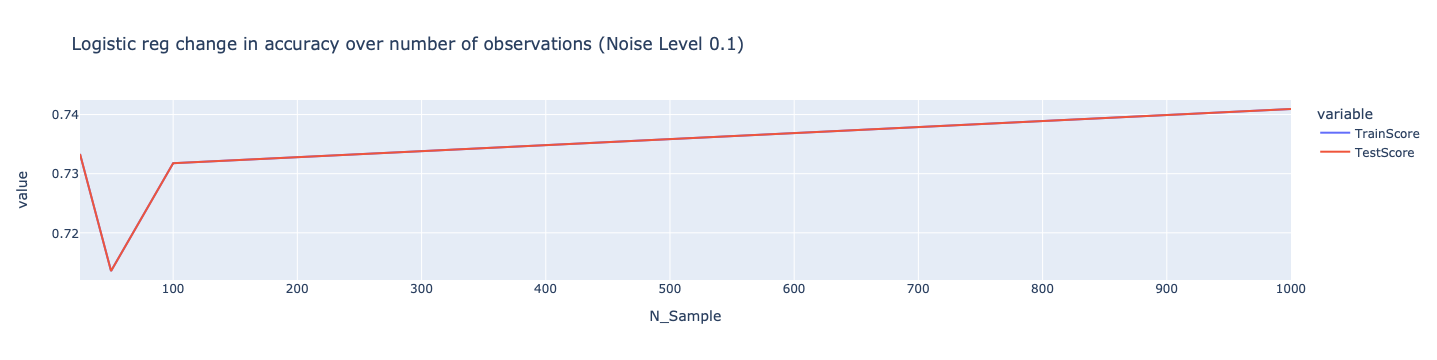

In [39]:
########### Q4

by_noise = results.groupby(["N_Sample","Noise_Level"]).mean()
by_noise = by_noise.reset_index() 
px.line(by_noise.query("Noise_Level == 0.1"),x = "N_Sample", y = ['TrainScore','TestScore'],title = "Logistic reg change in accuracy over number of observations (Noise Level 0.1)")

In [40]:
@widgets.interact
def plot_noisy_result(noise_level = widgets.FloatSlider(value=0, min=0.0, max=0.5, step=0.1)):
    by_noise = results.groupby(["N_Sample","Noise_Level"]).mean()
    by_noise = by_noise.reset_index() 
    query_string = f"Noise_Level == {noise_level}"
    return px.line(by_noise.query(query_string),x = "N_Sample", y = ['TrainScore','TestScore','diffScore'],title = "Logistic reg change in accuracy over number of observations (Noise Level 0.1)")


interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5), Output()), _dom_classes=('wi…

In [41]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons,make_circles
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


def generate_data(n, noise_level, ds_name):
    if ds_name == "moons":
        X, y = make_moons(n_samples=n, noise=noise_level, random_state=42)
    elif ds_name == "circles":  
        X, y = make_circles(n_samples=n, noise=noise_level, random_state=42)
    else:
        print("Invalid dataset name")
        return None
    return X, y



def split_data(X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_val, y_train, y_val


def optimize_model(X_train, y_train, X_val, y_val, clf_name):
    if clf_name == 'svm':
        param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
        clf = SVC(kernel='rbf')
    elif clf_name == 'logistic':
        param_grid = {'C': [0.1, 1, 10]}
        clf = LogisticRegression()
    elif clf_name == 'randomforest':
        param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15]}
        clf = RandomForestClassifier()  

    else:
        print("Invalid classifier name")
        return None
    
    grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_clf = grid_search.best_estimator_
    
    tre = accuracy_score(y_train, best_clf.predict(X_train))
    teste = accuracy_score(y_val, best_clf.predict(X_val))
    e_diff = abs(tre - teste)
    
    if clf_name == 'svm':
            results = {'DS_NAME': ds, 'N': X_train.shape[0], 'NL': nl,
               'CLF_NAME': clf_name, 'K': 'rbf', 'TRE': tre, 'TESTE': teste, 'E_DIFF': e_diff,
               'Hyper_Parameters': str(best_params)}
    else:
        results = {'DS_NAME': ds, 'N': X_train.shape[0], 'NL': nl,
               'CLF_NAME': clf_name, 'K': '-', 'TRE': tre, 'TESTE': teste, 'E_DIFF': e_diff,
               'Hyper_Parameters': str(best_params)}
        
        

    
    return results


# loop over different noise levels and sample sizes
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
sample_sizes = [100, 500, 1000,10000]
ds_names=['moons','circles']
results = []
clf_names=['svm','logistic','randomforest']

for ds in ds_names:
    for nl in noise_levels:
        for n in sample_sizes:
            X, y = generate_data(n, nl,ds)
            X_train, X_val, y_train, y_val = split_data(X, y)
            
            for clf_name in clf_names:
                clf_results = optimize_model(X_train, y_train, X_val, y_val, clf_name)
                results.append(clf_results)


# save results as a pandas dataframe
df = pd.DataFrame(results)
df_sorted = df.sort_values(by=['E_DIFF', 'TESTE'], ascending=True)
df_sorted.to_csv('results.csv', index=False)

In [42]:
# df_filtered = df[(df['N'] == 8000) & (df['CLF_NAME'] == 'svm')].sort_values(by=['E_DIFF', 'TESTE'], ascending=True)

In [56]:
df_filtered = df[(df['CLF_NAME'] == 'svm')].sort_values(by=['E_DIFF', 'TESTE'], ascending=True)

In [57]:
df_filtered

,DS_NAME,N,NL,CLF_NAME,K,TRE,TESTE,E_DIFF,Hyper_Parameters
0,moons,80,0.0,svm,rbf,1.000000,1.0000,0.000000,"{'C': 1, 'gamma': 1}"
3,moons,400,0.0,svm,rbf,1.000000,1.0000,0.000000,"{'C': 0.1, 'gamma': 10}"
6,moons,800,0.0,svm,rbf,1.000000,1.0000,0.000000,"{'C': 0.1, 'gamma': 1}"
9,moons,8000,0.0,svm,rbf,1.000000,1.0000,0.000000,"{'C': 0.1, 'gamma': 1}"
12,moons,80,0.1,svm,rbf,1.000000,1.0000,0.000000,"{'C': 1, 'gamma': 10}"
15,moons,400,0.1,svm,rbf,1.000000,1.0000,0.000000,"{'C': 0.1, 'gamma': 10}"
18,moons,800,0.1,svm,rbf,1.000000,1.0000,0.000000,"{'C': 10, 'gamma': 1}"
72,circles,80,0.0,svm,rbf,1.000000,1.0000,0.000000,"{'C': 1, 'gamma': 10}"
75,circles,400,0.0,svm,rbf,1.000000,1.0000,0.000000,"{'C': 1, 'gamma': 1}"
78,circles,800,0.0,svm,rbf,1.000000,1.0000,0.000000,"{'C': 0.1, 'gamma': 10}"


In [52]:
@widgets.interact
def plot_noisy_result(noise_level = widgets.FloatSlider(value=0, min=0.0, max=0.5, step=0.1)):
    by_noise = df_filtered.groupby(["N","NL"]).mean()
    by_noise = by_noise.reset_index() 
    query_string = f"NL == {noise_level}"
    return px.line(by_noise.query(query_string),x = "N", y = ['TRE','TESTE','E_DIFF'],title = "Logistic reg change in accuracy over number of observations (Noise Level 0.1)")


interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5), Output()), _dom_classes=('wi…

In [53]:
#For SVM only, For dataset of size 10k and for each dataset, What are the best model params? How stable is it?

df_filtered=df[(df['N'] == 8000) & (df['CLF_NAME'] == 'svm')].sort_values(by=['E_DIFF', 'TESTE'], ascending=True)
# TESTE
# query_string =  f"TESTE >= {}"
# df_filtered.query('')
df_filtered.groupby(['NL','Hyper_Parameters']).mean().sort_values(by=['E_DIFF', 'TESTE'], ascending=True).reset_index()

,NL,Hyper_Parameters,N,TRE,TESTE,E_DIFF
0,0.0,"{'C': 0.1, 'gamma': 1}",8000.0,1.000000,1.0000,0.000000
1,0.1,"{'C': 1, 'gamma': 10}",8000.0,0.999500,0.9985,0.001000
2,0.2,"{'C': 10, 'gamma': 1}",8000.0,0.973125,0.9760,0.002875
3,0.4,"{'C': 1, 'gamma': 10}",8000.0,0.865625,0.8685,0.002875
4,0.1,"{'C': 1, 'gamma': 0.1}",8000.0,0.837625,0.8310,0.006625
5,0.3,"{'C': 1, 'gamma': 1}",8000.0,0.918375,0.9270,0.008625
6,0.5,"{'C': 10, 'gamma': 0.1}",8000.0,0.698187,0.6935,0.012063
7,0.4,"{'C': 0.1, 'gamma': 1}",8000.0,0.594125,0.5785,0.015625
8,0.3,"{'C': 10, 'gamma': 1}",8000.0,0.629625,0.6125,0.017125
9,0.2,"{'C': 1, 'gamma': 1}",8000.0,0.692125,0.6720,0.020125


answer : 


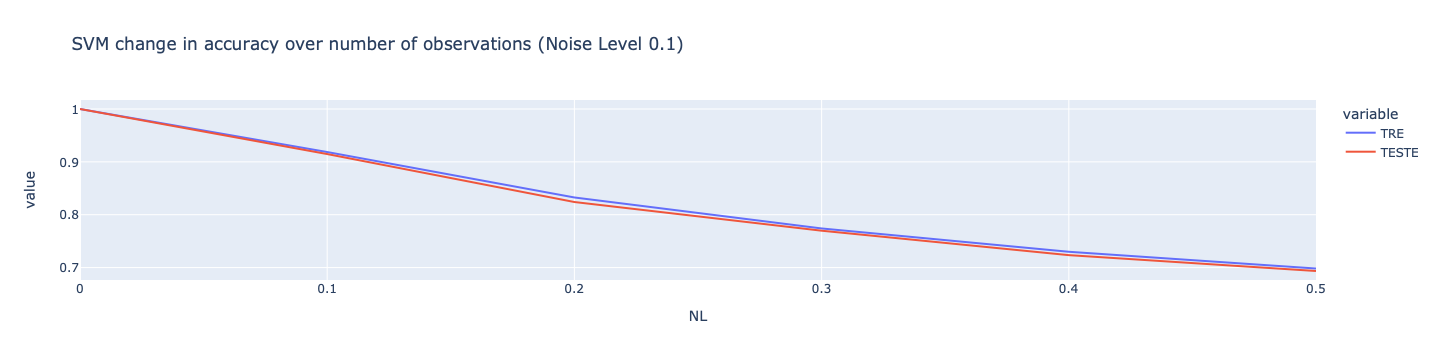

In [54]:
byNoise = df_filtered.groupby(['NL']).mean().sort_values(by=['E_DIFF', 'TESTE'], ascending=True).reset_index()
px.line(by_noise,x = "NL", y = ['TRE','TESTE'],title = "SVM change in accuracy over number of observations (Noise Level 0.1)")

#### For SVM only, For dataset of size 10k and for each dataset, What is the most stable model and model params? How good is it in comparison to other models? Explain using bias and variance terminoligy.


From my result we can see good stabiliy for c=10 and gamma equal to 1






#### Does regularization help for linear models? consider different datasets sizes. 


we can see that regularization not help to linear models when the capacity of the model is not enough.


#### For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? (answer for svm and LR seperatly)

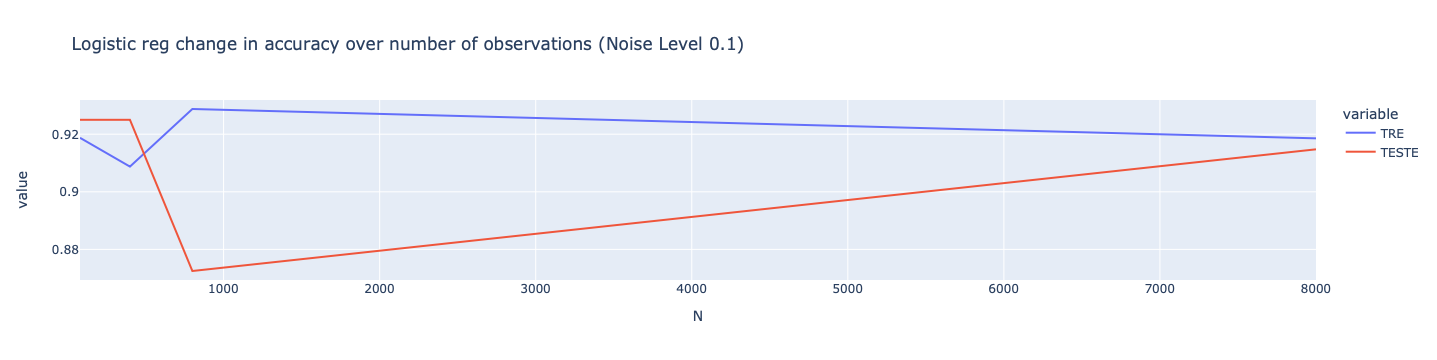

In [58]:
df_filtered = df[(df['CLF_NAME'] == 'svm')].sort_values(by=['E_DIFF', 'TESTE'], ascending=True)
by_noise = df_filtered.groupby(["N","NL"]).mean()
by_noise = by_noise.reset_index() 
px.line(by_noise.query("NL == 0.1"),x = "N", y = ['TRE','TESTE'],title = "Logistic reg change in accuracy over number of observations (Noise Level 0.1)")

we can see that for increasing size the test error is smaller

#### For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? (answer for svm and LR seperatly)

one can see that the error difference is smaller when the database is bigger



 #### Are the noise level effect the number of datapoints needed to reach optimal test results? 
 
 
 yes, with noise level the size is changed 

### Analysing the expermient results

1. For SVM only, For dataset of size 10k and for each dataset, What are the best model params? How stable is it? 
1. For SVM only, For dataset of size 10k and for each dataset, What is the most stable model and model params? How good is it in comparison to other models? Explain using bias and variance terminoligy.
1. Does regularization help for linear models? consider different datasets sizes. 
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? (answer for svm and LR seperatly)
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? (answer for svm and LR seperatly)
1. Are the noise level effect the number of datapoints needed to reach optimal test results? 

Bonus:

* For SVM: Select one dataset and with 0.2 noise level. Identify the optimal model params, and visualize the decision boundry learned. 
  * Hint: Use a grid. See classification models notebook 

## Tips and Hints

For buliding the experiment:

* Start with one dataframe holding all the data for both datastes with different noise level. Use the `make_<dataset_name>_dataframe()` functions below, and add two columns, dataset_name and noise_level, before appending the new dataset to the rest of the datasets. Use `df = pd.DataFrame()` to start with an empty dataframe and using a loop, add data to it using `df = df.append(<the needed df here>)`. Verify that you have 10k samples for each dataset type and noise level by a proper `.value_counts()`. You can modify the 
* When you'll need an N samples data with a specific noise level, use `query()` and `head(n)` to get the needed dataset. 
* Use sklearn `train_test_split()` method to split the data with `test_size` and `random_state` parameters set correctly to ensure you are always splitting the data the same why for a given fold `k`. Read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) if needed. 
* You can also not create your own data splitter, and instead use `model_selection.cross_validate()` from sklearn. You'll need to ask for the train erros as well as the test errors, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).
* Use prints in proper location to ensure the progress of the experiment. 

**If you get stuck, and need refernce, scroll to the end of the notebook to see more hints!**

## Moons dataset

In [37]:
from sklearn.datasets import make_moons

In [38]:
moons_df = make_moons_dataframe(n_samples=1000, noise_level=0.1)
moons_df.head()

,x,y,label
0,0.917089,0.154399,A
1,0.771049,0.618307,A
2,1.125509,-0.606562,B
3,0.320468,-0.036045,B
4,-0.789438,0.579297,A


In [39]:
@widgets.interact
def plot_noisy_moons(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    moons_df = make_moons_dataframe(n_samples=1000, noise_level=noise_level)
    return px.scatter(moons_df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Circles Dataset

In [40]:
circles_df = make_circles_dataframe(n_samples=500, noise_level=0)
circles_df.head()

,x,y,label
0,0.750987,0.275714,B
1,-0.492727,0.870184,A
2,-0.863923,-0.503623,A
3,0.637424,-0.770513,A
4,0.228015,-0.766817,B


In [41]:
@widgets.interact
def plot_noisy_circles(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    df = make_circles_dataframe(1000, noise_level)
    return px.scatter(df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Appendix

### More hints!

If you'll build the datasets dataframe correctly, you'll have **one** dataframe that has dataset_name and noise_level colmuns, as well as the regular x,y,label colmns. To unsure you've appended everything correctly, groupby the proper colmuns and look at the size:

In [ ]:
# Use proper groupby statement to ensure the datasets dataframe contains data as expected. You should see the following result:

Your 

You experiment code should look something like that:

In [ ]:
# datasets_type = ['circles', 'moons']
# k_folds = 10
# n_samples = [10, 50, 100, 1000, 10000]
# noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
# clf_types = ['log_reg', 'svm']
# hp_range = <'Your hyper parameters ranges here'>
# regularization_values = <'Your regularization values here'>
# results = []
# for ds_type in datasets_type:
#     print(f'Working on {ds_type}')
#     for nl in noise_levels:
#         for n in n_samples:
#             ds = datasets.query(<'your query here'>).head(n)
#             print(f'Starting {k_folds}-fold cross validation for {ds_type} datasets with {n} samples and noise level {nl}. Going to train {clf_types} classifiers.')
#             for k in range(k_folds):
#                 X, Y = <'Your code here'>
#                 x_train,x_test,y_train,y_test= <'Your code here'>
#                 for clf_type in clf_types:
#                     if clf_type == 'log_reg':
#                         for regularization_value in regularization_values:
#                             train_acc, test_acc = <'Your code here'>
#                             results.append(<'Your code here'>)
#                     if clf_type == 'svm':
#                         for gamma in hp_range:
#                             train_acc, test_acc = <'Your code here'>
#                             results.append(<'Your code here'>)

SyntaxError: invalid syntax (3386946450.py, line 6)

In [ ]:
########## OLD #####################

# results = pd.DataFrame(columns=['N_Sample','Noise_Level','Hyper_Params','ridge_regularization','Score'])


##### WITH FUNCTIONS

# for f in models_functions:
#     for DS_NAME in DS_NAMEs:
#         for N in Ns:
#             for NL in NLs:
#                 for k in range(k_folds):
#                     for HP in HPs:
#                         for RR in RRs:
#                             dateCreateAndModelRun(f,DS_NAME,N,NL,HP,RR)
                        

###### ONLY LOGISTIC 

# for DS_NAME in DS_NAMEs:
#         for N in Ns:
#             for NL in NLs:
#                 df=createDataSet(DS_NAME,N,NL)
#                 x_train,x_test,y_train,y_test=train_test_split(df.loc[:,['x','y']],df.label,test_size=0.2,random_state=42)
#                 training_data=pd.DataFrame({'x':x_train.x,'y':x_train.y,'target':y_train})
#                 fold_size = int(len(x_train) / k_folds) 
#                 for k in range(k_folds):
#                     fold_data = training_data[k * fold_size: (k+1) * fold_size]
#                     t_data = training_data[~x_train.index.isin(fold_data)]
#                     for HP in HPs:
#                         for RR in RRs:
#                             results.append([N,NL,HP,RR,dateCreateAndModelRun(t_data.loc[:,['x','y']],fold_data.loc[:,['x','y']],t_data['target'],fold_data['target'],HP,RR)])
    
    

# ans = pool_obj.map(printVal,range(0,2))  
# pool_obj.map(DS_NAMEs)
# pool_obj.close()

# p = Process(target=calculationToEveryDataSet, args=(DS_NAMEs))
# p.start()
# p.join()



